<a href="https://colab.research.google.com/github/deinhaaguiar/arquivos_aulas/blob/master/Exercicios_de_Bibliotecas_Python_V2_Numpy%2C_Pandas_e_Matplot_%5BALUNO%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A utilização dos dados para analisar a estrutura do RH e os perfis dos colaboradores de uma empresa é algo essencial nos dias atuais com o advendo da tecnologia. Traçar um perfil ou entender como é o quadro de funcionários se tornou algo muito mais fácil com a utilização de ferramentas como excel, power bi e python. Neste contexto, você utilizando o dataset [Human Resources Data Set](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set), e o glossário de todos as variáveis está disponível no [Codebook](https://rpubs.com/rhuebner/hrd_cb_v14), você dee responder as 10 perguntas para praticar os conceitos adquiridos nas aulas sobre bibliotecas e para aprender funções ou conceitos novos.
- 1 - Quantas pessoas diferentes o RH mapeou no estudo (Nome diferentes - Usando pandas e Numpy)?
- 2 - Calcule a porcentagem dos colaboradores por Estado (State) (Faça em Pandas e Numpy).
- 3 - Com os dados calculados na etapa anterior, crie um gráfico de barras dos 3 estados com mais funcionários e o número de funcionários (Faça o processo em Matplot, Seaborn e Plotly)
- 4 - Utilizando o Seaborn e o Plotly, calcule através de um gráfico quantos colaboradores cada manager é responsável. (Dica: se não souber, pesquise por countplot ou histogram)
- 5 - Crie um dataframe chamado df_hired com os trabalhadores que ainda não foram demitidos. (Coluna DateofTermination nula)
- 6 - Utilizando o dataframe da questão anterior, sabendo que o salário nos EUA é um valor anual, calcule o quanto cada colaborador deveria ter juntado se estivesse trabalhando até final de 2022. Considere um imposto anual de 5%, qual seria o valor final?
- 7 - Usando somente o Seaborn e Plotly, construa um gráfico que mostre o a quantidade de Pessoas do gênero Masculino e Feminino em cada grupo conjugal (Eixo x = MaritalDesc)
- 8 - Crie um gráfico usando a função barplot do Searbon para a variável Salary agrupando por SpecialProjectsCount. Quais informações podem ser obtidas através desse gráfico?
- 9 - Utilizando a função groupby e as agregações do pandas, calcule a média salarial (separadamente) por Departamento, por Raça e Position
- 10 - Obter informações rápidas e fáceis acerca dos dados é algo crucial na análise dos dados. Saber por exemplo quantos nulos, média, desvio padrão, tipo dos dados e outras informações é algo crucial no dia a dia do Cientista de Dados. Realize um df.info() e responda quais informações podemos tirar destes dados?


## Import e seleção dos dados

In [ ]:
#-- Importação de bibliotecas e dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#-- Import via colab
# from google.colab import files
# files.upload()
# df = pd.read_csv('/content/HRDataset_v14.csv')

#-- Import via drive
df = pd.read_csv('/content/drive/MyDrive/HRDataset_v14.csv')

# Selecionando apenas algumas colunas
df = df[[
    'Employee_Name','Salary','PerfScoreID',
    'FromDiversityJobFairID','Position',
    'State','DOB','Sex',
    'MaritalDesc','RaceDesc','DateofHire',
    'DateofTermination','Department','ManagerName',
    'RecruitmentSource','PerformanceScore', 'EngagementSurvey',
    'SpecialProjectsCount','LastPerformanceReview_Date','DaysLateLast30','Absences']]


df['year'] = df['DOB'].apply(lambda x: int(str(x).split('/')[-1]))
df['month'] = df['DOB'].apply(lambda x: int(str(x).split('/')[0]))

df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%Y',errors='coerce')




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 - Quantas pessoas diferentes o RH mapeou no estudo (Nome diferentes - Usando pandas e Numpy)?

In [ ]:
valores_unicos=len(np.unique(df['Employee_Name'])) # numpy

print(valores_unicos)

311


In [ ]:
len(df["Employee_Name"].unique()) #Pandas

311

## 2 - Calcule a porcentagem dos colaboradores por Estado (State) (Faça em Pandas e Numpy).

In [ ]:
unique, counts = np.unique(df.State, return_counts=True)  # é usado para atribuir as duas listas de saída da função unique() para as variáveis "unique" e "counts". #numpy = 

max = counts.sum()   #é usado para calcular a soma total de todas as contagens.
for i in range(len(unique)): #é usado para criar um loop que varre todos os valores únicos.
  print(f'{unique[i]}: {counts[i]/max*100}') #Imprime cada valor único e sua respectiva porcentagem de ocorrência, dividindo a contagem do valor único atual pelo total de contagens e multiplicando por 100.

AL: 0.3215434083601286
AZ: 0.3215434083601286
CA: 0.3215434083601286
CO: 0.3215434083601286
CT: 1.929260450160772
FL: 0.3215434083601286
GA: 0.3215434083601286
ID: 0.3215434083601286
IN: 0.3215434083601286
KY: 0.3215434083601286
MA: 88.7459807073955
ME: 0.3215434083601286
MT: 0.3215434083601286
NC: 0.3215434083601286
ND: 0.3215434083601286
NH: 0.3215434083601286
NV: 0.3215434083601286
NY: 0.3215434083601286
OH: 0.3215434083601286
OR: 0.3215434083601286
PA: 0.3215434083601286
RI: 0.3215434083601286
TN: 0.3215434083601286
TX: 0.964630225080386
UT: 0.3215434083601286
VA: 0.3215434083601286
VT: 0.6430868167202572
WA: 0.3215434083601286


In [ ]:
df.State.value_counts(normalize = True)*100

MA    88.745981
CT     1.929260
TX     0.964630
VT     0.643087
UT     0.321543
AZ     0.321543
ND     0.321543
OR     0.321543
MT     0.321543
NV     0.321543
ID     0.321543
KY     0.321543
NC     0.321543
FL     0.321543
GA     0.321543
CO     0.321543
NY     0.321543
PA     0.321543
RI     0.321543
NH     0.321543
TN     0.321543
IN     0.321543
OH     0.321543
CA     0.321543
WA     0.321543
AL     0.321543
VA     0.321543
ME     0.321543
Name: State, dtype: float64

## 3 - Com os dados calculados na etapa anterior, crie um gráfico de barras dos 3 estados com mais funcionários e o número de funcionários (Faça o processo em Matplot, Seaborn e Plotly)

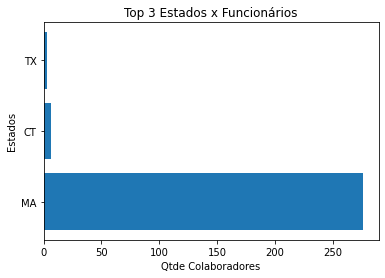

In [ ]:
index = df.State.value_counts().index  #calcula os valores exclusivos na coluna 'State' de um dataframe do pandas df e retorna o índice de suas contagens de frequência.
val = df.State.value_counts().values # calcula a contagem de frequência de cada valor exclusivo na coluna 'Estado' de um dataframe do pandas dfe retorna uma matriz desses valores.
plt.title('Top 3 Estados x Funcionários')
plt.xlabel('Qtde Colaboradores')
plt.ylabel('Estados');
plt.barh(index[:3], val[:3]);

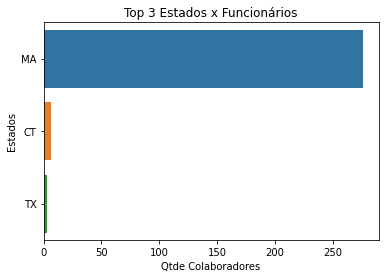

In [ ]:
sns.barplot(y= index[:3],x = val[:3])
plt.title('Top 3 Estados x Funcionários')
plt.xlabel('Qtde Colaboradores')
plt.ylabel('Estados');

In [ ]:
fig = px.bar(y= index[:3],x = val[:3])
fig.update_layout(title = {'text': "Top 3 Estados por Colaborador", "y": 0.95, "x":0.5, "xanchor": 'center', "yanchor": 'top' })
fig.update_xaxes(title = 'Qtde Colaboradores')
fig.update_yaxes(title = 'Estados')
fig.show()

## 4 - Utilizando o Seaborn e o Plotly, calcule através de um gráfico quantos colaboradores cada manager é responsável. (Dica: se não souber, pesquise por countplot ou histogram)

In [ ]:
df.keys()

Index(['Employee_Name', 'Salary', 'PerfScoreID', 'FromDiversityJobFairID',
       'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'year', 'month'],
      dtype='object')

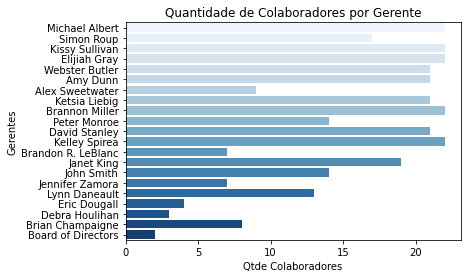

In [ ]:
sns.countplot(data=df,y='ManagerName',palette = 'Blues');
plt.title('Quantidade de Colaboradores por Gerente')
plt.xlabel('Qtde Colaboradores')
plt.ylabel('Gerentes');

In [ ]:
fig = px.histogram(df, y = 'ManagerName' )
fig.update_layout(title = {'text': 'Quantidade de Colaboradores por Gerente', "y": 0.95, "x":0.5, "xanchor": 'center', "yanchor": 'top' })
fig.update_xaxes(title = 'Qtde Colaboradores')
fig.update_yaxes(title = 'Estados')
fig.show()

In [ ]:
df.columns


Index(['Employee_Name', 'Salary', 'PerfScoreID', 'FromDiversityJobFairID',
       'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'year', 'month'],
      dtype='object')

## 5 - Crie um dataframe chamado df_hired com os trabalhadores que ainda não foram demitidos. (Coluna DateofTermination nula)

In [ ]:
df_hired = df['DateofTermination'].isnull() # Essa sintaxe retorna true ou False
print(df_hired)

0       True
1      False
2      False
3       True
4      False
       ...  
306     True
307    False
308     True
309     True
310     True
Name: DateofTermination, Length: 311, dtype: bool


In [ ]:
df_hired = df[pd.isnull(df['DateofTermination'])] # Essa sintaxe cria um novo dataframe
df_hired

,Employee_Name,Salary,PerfScoreID,FromDiversityJobFairID,Position,State,DOB,Sex,MaritalDesc,RaceDesc,...,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,year,month
0,"Adinolfi, Wilson K",62506,4,0,Production Technician I,MA,07/10/83,M,Single,White,...,Michael Albert,LinkedIn,Exceeds,4.60,0,1/17/2019,0,1,83,7
3,"Alagbe,Trina",64991,3,0,Production Technician I,MA,09/27/88,F,Married,White,...,Elijiah Gray,Indeed,Fully Meets,4.84,0,1/3/2019,0,15,88,9
5,"Anderson, Linda",57568,4,0,Production Technician I,MA,05/22/77,F,Single,White,...,Amy Dunn,LinkedIn,Exceeds,5.00,0,1/7/2019,0,15,77,5
6,"Andreola, Colby",95660,3,0,Software Engineer,MA,05/24/79,F,Single,White,...,Alex Sweetwater,LinkedIn,Fully Meets,3.04,4,1/2/2019,0,19,79,5
7,"Athwal, Sam",59365,3,0,Production Technician I,MA,02/18/83,M,Widowed,White,...,Ketsia Liebig,Employee Referral,Fully Meets,5.00,0,2/25/2019,0,19,83,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Wolk, Hang T",60446,3,0,Production Technician II,MA,04/20/85,F,Single,White,...,David Stanley,LinkedIn,Fully Meets,3.40,0,2/21/2019,0,14,85,4
306,"Woodson, Jason",65893,3,0,Production Technician II,MA,05/11/85,M,Single,White,...,Kissy Sullivan,LinkedIn,Fully Meets,4.07,0,2/28/2019,0,13,85,5
308,"Zamora, Jennifer",220450,4,0,CIO,MA,08/30/79,F,Single,White,...,Janet King,Employee Referral,Exceeds,4.60,6,2/21/2019,0,16,79,8
309,"Zhou, Julia",89292,3,0,Data Analyst,MA,02/24/79,F,Single,White,...,Simon Roup,Employee Referral,Fully Meets,5.00,5,2/1/2019,0,11,79,2


In [ ]:
df_hired.columns

Index(['Employee_Name', 'Salary', 'PerfScoreID', 'FromDiversityJobFairID',
       'Position', 'State', 'DOB', 'Sex', 'MaritalDesc', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'Department', 'ManagerName',
       'RecruitmentSource', 'PerformanceScore', 'EngagementSurvey',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'year', 'month'],
      dtype='object')

## 6 - Utilizando o dataframe da questão anterior, sabendo que o salário nos EUA é um valor anual, calcule o quanto cada colaborador deveria ter juntado se estivesse trabalhando até final de 2022. Considere um imposto anual de 5%, qual seria o valor final?

In [ ]:
df_hired['TotalAmount'] = df_hired['Salary']*(2022 - df_hired['year'])*(1-0.05)
df_hired

<ipython-input-128-e42538d70b0f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Employee_Name,Salary,PerfScoreID,FromDiversityJobFairID,Position,State,DOB,Sex,MaritalDesc,RaceDesc,...,RecruitmentSource,PerformanceScore,EngagementSurvey,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,year,month,TotalAmount
0,"Adinolfi, Wilson K",62506,4,0,Production Technician I,MA,07/10/83,M,Single,White,...,LinkedIn,Exceeds,4.60,0,1/17/2019,0,1,83,7,1.151392e+08
3,"Alagbe,Trina",64991,3,0,Production Technician I,MA,09/27/88,F,Married,White,...,Indeed,Fully Meets,4.84,0,1/3/2019,0,15,88,9,1.194080e+08
5,"Anderson, Linda",57568,4,0,Production Technician I,MA,05/22/77,F,Single,White,...,LinkedIn,Exceeds,5.00,0,1/7/2019,0,15,77,5,1.063713e+08
6,"Andreola, Colby",95660,3,0,Software Engineer,MA,05/24/79,F,Single,White,...,LinkedIn,Fully Meets,3.04,4,1/2/2019,0,19,79,5,1.765740e+08
7,"Athwal, Sam",59365,3,0,Production Technician I,MA,02/18/83,M,Widowed,White,...,Employee Referral,Fully Meets,5.00,0,2/25/2019,0,19,83,2,1.093533e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Wolk, Hang T",60446,3,0,Production Technician II,MA,04/20/85,F,Single,White,...,LinkedIn,Fully Meets,3.40,0,2/21/2019,0,14,85,4,1.112297e+08
306,"Woodson, Jason",65893,3,0,Production Technician II,MA,05/11/85,M,Single,White,...,LinkedIn,Fully Meets,4.07,0,2/28/2019,0,13,85,5,1.212530e+08
308,"Zamora, Jennifer",220450,4,0,CIO,MA,08/30/79,F,Single,White,...,Employee Referral,Exceeds,4.60,6,2/21/2019,0,16,79,8,4.069176e+08
309,"Zhou, Julia",89292,3,0,Data Analyst,MA,02/24/79,F,Single,White,...,Employee Referral,Fully Meets,5.00,5,2/1/2019,0,11,79,2,1.648196e+08


## 7 - Usando somente o Seaborn e Plotly, construa um gráfico que mostre o a quantidade de Pessoas do gênero Masculino e Feminino em cada grupo conjugal (Eixo x = MaritalDesc)

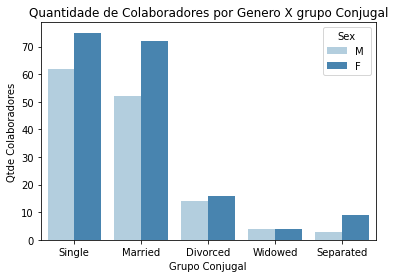

In [ ]:
sns.countplot(data=df,x='MaritalDesc', hue = 'Sex', palette = 'Blues');
plt.title('Quantidade de Colaboradores por Genero X grupo Conjugal')
plt.xlabel('Grupo Conjugal')
plt.ylabel('Qtde Colaboradores');

In [ ]:
px.histogram(df,x='MaritalDesc',color='Sex')

## 8 - Crie um gráfico usando a função barplot do Searbon para a variável Salary agrupando por SpecialProjectsCount. Quais informações podem ser obtidas através desse gráfico?

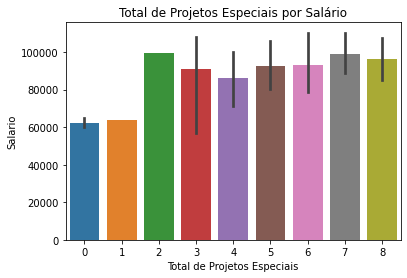

In [ ]:
sns.barplot(data=df, x='SpecialProjectsCount',y='Salary');
plt.title('Total de Projetos Especiais por Salário')
plt.ylabel('Salario')
plt.xlabel('Total de Projetos Especiais');

## 9 - Utilizando a função groupby e as agregações do pandas, calcule a média salarial (separadamente) por Departamento, por Raça e Position

In [ ]:
df.groupby('Department', as_index = False).agg({'Salary':'mean'})

,Department,Salary
0,Admin Offices,71791.888889
1,Executive Office,250000.000000
2,IT/IS,97064.640000
3,Production,59953.545455
4,Sales,69061.258065
5,Software Engineering,94989.454545


In [ ]:
df.groupby('RaceDesc', as_index = False).agg({'Salary':'mean'})

,RaceDesc,Salary
0,American Indian or Alaska Native,65806.000000
1,Asian,68521.206897
2,Black or African American,74431.025000
3,Hispanic,83667.000000
4,Two or more races,59998.181818
5,White,67287.545455


In [ ]:
df.groupby('Position', as_index = False).agg({'Salary':'mean'})

,Position,Salary
0,Accountant I,63507.666667
1,Administrative Assistant,52280.000000
2,Area Sales Manager,64932.555556
3,BI Developer,95465.000000
4,BI Director,110929.000000
5,CIO,220450.000000
6,Data Analyst,89932.571429
7,Data Analyst,88527.000000
8,Data Architect,150290.000000
9,Database Administrator,108499.600000


## 10 - Obter informações rápidas e fáceis acerca dos dados é algo crucial na análise dos dados. Saber por exemplo quantos nulos, média, desvio padrão, tipo dos dados e outras informações é algo crucial no dia a dia do Cientista de Dados. Realize um df.info() e responda quais informações podemos tirar destes dados?

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   Salary                      311 non-null    int64         
 2   PerfScoreID                 311 non-null    int64         
 3   FromDiversityJobFairID      311 non-null    int64         
 4   Position                    311 non-null    object        
 5   State                       311 non-null    object        
 6   DOB                         311 non-null    object        
 7   Sex                         311 non-null    object        
 8   MaritalDesc                 311 non-null    object        
 9   RaceDesc                    311 non-null    object        
 10  DateofHire                  311 non-null    object        
 11  DateofTermination           104 non-null    datetime64[ns]